<a href="https://colab.research.google.com/github/JosueAfouda/TUTORIALS/blob/main/YouTube_comments_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librairies
import pandas as pd
import numpy as np

In [3]:
#pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=bce882a03c5ce2bd14b544b2f9de2936dba75bf0ce832cf63d48515ba84b848a
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [4]:
# Données (Source : https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection)
# Les commentaires au niveau de 5 vidéos YouTube
import wget
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00380/YouTube-Spam-Collection-v1.zip'
wget.download(url)

'YouTube-Spam-Collection-v1.zip'

In [6]:
# Extraction des fichiers dans le dossier zip

from zipfile import ZipFile 

file = "YouTube-Spam-Collection-v1.zip"
  
# open the zip file in read mode
with ZipFile(file, 'r') as zip: 
    # list all the contents of the zip file
    zip.printdir() 
  
    # extract all files
    print('extraction...') 
    zip.extractall() 
    print('Done!')

File Name                                             Modified             Size
Youtube01-Psy.csv                              2017-03-26 18:29:06        57438
__MACOSX/                                      2017-03-26 18:33:38            0
__MACOSX/._Youtube01-Psy.csv                   2017-03-26 18:29:06          177
Youtube02-KatyPerry.csv                        2017-03-26 18:29:22        64279
__MACOSX/._Youtube02-KatyPerry.csv             2017-03-26 18:29:22          177
Youtube03-LMFAO.csv                            2017-03-26 18:29:26        64419
__MACOSX/._Youtube03-LMFAO.csv                 2017-03-26 18:29:26          177
Youtube04-Eminem.csv                           2017-03-26 18:29:30        82896
__MACOSX/._Youtube04-Eminem.csv                2017-03-26 18:29:30          177
Youtube05-Shakira.csv                          2017-03-26 18:29:34        72706
__MACOSX/._Youtube05-Shakira.csv               2017-03-26 18:29:34          177
extraction...
Done!


On s'est assuré que les 05 datasets ont la même configuration (même nombre et noms de colonnes). Nous allons donc pouvoir les concactener afin de former un seul jeu de données.

In [49]:
df = pd.concat([
                pd.read_csv('Youtube01-Psy.csv'),
                pd.read_csv('Youtube02-KatyPerry.csv'),
                pd.read_csv('Youtube03-LMFAO.csv'),
                pd.read_csv('Youtube04-Eminem.csv'),
                pd.read_csv('Youtube05-Shakira.csv')
])
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


1 : spam, 0: not spam

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


In [59]:
# Exemple de contenu spam
df.CONTENT.iloc[3]

'me shaking my sexy ass on my channel enjoy ^_^ \ufeff'

In [60]:
# Exemple de contenu non spam
df.CONTENT.iloc[-1]

'Shakira is the best dancer'

In [61]:
df.CLASS.value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [94]:
len('hello world')

11

In [95]:
# Feature Engineering
df['CONTENT_LENGHT'] = df['CONTENT'].apply(lambda x: len(x))
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTENT_LENGHT
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39
...,...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0,58
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0,93
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0,3
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0,23


In [96]:
# Fonction qui donne le taux de ponctuation  dans un texte
import string
def count_punctuation(text):
    binary_array = [1 for ch in text if ch in string.punctuation] 
    nb_ponctuation = sum(binary_array)
    total = len(text) - text.count(" ")
    return nb_ponctuation / total

In [97]:
# Colonne donnant le taux de ponctuation dans un commentaire
df['PUNCTUATION_RATE'] = df['CONTENT'].apply(lambda x: count_punctuation(x))
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTENT_LENGHT,PUNCTUATION_RATE
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56,0.081633
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166,0.066667
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38,0.032258
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,0.078947
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,0.090909
...,...,...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0,58,0.043478
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0,93,0.039474
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0,3,0.000000
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0,23,0.000000


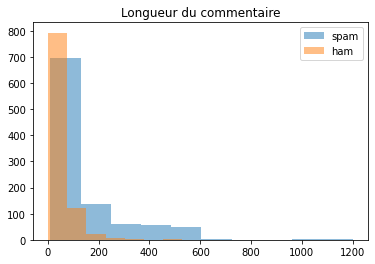

In [99]:
# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df[df['CLASS']== 1]['CONTENT_LENGHT'], alpha=0.5, label='spam')
plt.hist(df[df['CLASS']== 0]['CONTENT_LENGHT'], alpha=0.5, label='ham')
plt.legend(loc='upper right')
plt.title('Longueur du commentaire')
plt.show()

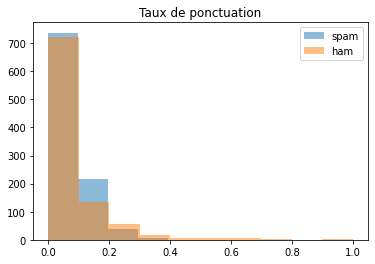

In [100]:
plt.hist(df[df['CLASS']== 1]['PUNCTUATION_RATE'], alpha=0.5, label='spam')
plt.hist(df[df['CLASS']== 0]['PUNCTUATION_RATE'], alpha=0.5, label='ham')
plt.legend(loc='upper right')
plt.title('Taux de ponctuation')
plt.show()

A partir de ces graphiques, nous pouvons dire que la longueur du commentaire (variable ***CONTENT_LENGTH***) a probablement un pouvoir prédictif sur le type de commentaire (spam ou ham) ce qui n'est pas tellement le cas pour le taux de ponctuation. 

Nous ajouterons ces 2 variables comme *features*.

In [102]:
# Données d'entraînement et de test
from sklearn.model_selection import train_test_split
seed = 123
X_train, X_test, y_train, y_test = train_test_split(
    df[['CONTENT', 'CONTENT_LENGHT', 'PUNCTUATION_RATE']],
    df['CLASS'],
    test_size = 0.2,
    random_state = seed
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1564, 3)
y_train shape: (1564,)
X_test shape: (392, 3)
y_test shape: (392,)


In [103]:
X_train

,CONTENT,CONTENT_LENGHT,PUNCTUATION_RATE
38,Love this song! My soccer team made a cd for o...,77,0.032787
72,Sub my channel!﻿,16,0.071429
356,I WILL NEVER FORGET THIS SONG IN MY LIFE LIKE ...,105,0.058824
126,Love the way you lie - Driveshaft﻿,34,0.035714
340,*****PLEASE READ***** Hey everyone! I&#39;m a...,351,0.109929
...,...,...,...
422,check it out free stuff for watching videos an...,181,0.190476
208,"HEY GUYS!!! ❤❤❤❤❤❤❤ BEFORE YOU IGNORE ME, PLE...",504,0.052009
268,Hello. İ am from Azerbaijan<br />﻿,34,0.137931
251,dude check out psy,18,0.000000


In [104]:
y_train

38     0
72     1
356    1
126    0
340    1
      ..
422    1
208    1
268    0
251    1
396    1
Name: CLASS, Length: 1564, dtype: int64

In [105]:
# Sac de mots avec CountVectorizer 
#source : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() # Essayez après avec l'argument stop_words = 'english'
X_train_content_vec = vectorizer.fit_transform(X_train['CONTENT'])
X_test_content_vec = vectorizer.transform(X_test['CONTENT'])

In [110]:
X_train_content_vec

<1564x3846 sparse matrix of type '<class 'numpy.int64'>'
	with 20361 stored elements in Compressed Sparse Row format>

Après transformation avec *CountVectorizer*, l'ensemble d'entraînement est une matrice de 1564 lignes (il y a 1564 commentaires) et 3846 mots, c'est-à-dire qu'il y a au total 3846 mots distincts qui apparaissent dans les commentaires de l'ensemble d'entraînement. Ces mots représentent les *features* qui seront utilisées pour entraîner les algorithmes de Classification automatique.

In [107]:
# Affichage des features
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '002',
 '018',
 '034',
 '04',
 '047000',
 '05',
 '053012',
 '0687119038',
 '08',
 '09',
 '0d878a889c',
 '0dbhjzdw0lbsjbi40gxm0d0p5krhv8xinqli53__wqbahs8zx4mjhw5vwrkpxfoeks',
 '0laviqu2b',
 '10',
 '100',
 '1000',
 '10000000',
 '100000415527985',
 '100005244783212',
 '100007085325116',
 '10001',
 '100877300245414',
 '10200253113705769',
 '1030',
 '104999962146104962510',
 '10626048',
 '10626835',
 '106865403',
 '107297364',
 '1073741825',
 '1073741828',
 '1073741830',
 '1073741943',
 '108k',
 '109',
 '10b35481',
 '11',
 '1111',
 '1111111111111111111',
 '111719098841907',
 '111982027348137311818',
 '11th',
 '12',
 '123',
 '124',
 '124923004',
 '126',
 '127',
 '128gb',
 '12year',
 '13',
 '131275322914',
 '131338190916',
 '1337',
 '1340488',
 '1340489',
 '1340490',
 '1340491',
 '1340492',
 '1340493',
 '1340494',
 '1340499',
 '1340500',
 '1340502',
 '1340503',
 '1340504',
 '1340517',
 '1340518',
 '1340519',
 '1340520',
 '1340521',
 '1340522',
 '1340523',
 '1340524',
 '1344700

In [108]:
# La méthode get_feature_names() est obsolète et sera bientôt enlevée dans la future version de sklearn
len(vectorizer.get_feature_names_out())

3846

In [111]:
X_test_content_vec

<392x3846 sparse matrix of type '<class 'numpy.int64'>'
	with 4771 stored elements in Compressed Sparse Row format>

In [112]:
# Transformation de X_train_content_vec en une dataframe
X_train_content = pd.DataFrame(
    X_train_content_vec.toarray(),
    columns = vectorizer.get_feature_names_out()
)
X_train_content

,00,000,002,018,034,04,047000,05,053012,0687119038,...,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｅｂａｙ,ｆａｎｃy,ｈｔｔｐ,ｉｓ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｕｓｒ,ｗｗｗ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
# Transformation de X_test_content_vec en une dataframe
X_test_content = pd.DataFrame(
    X_test_content_vec.toarray(),
    columns = vectorizer.get_feature_names_out()
)
X_test_content

,00,000,002,018,034,04,047000,05,053012,0687119038,...,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｅｂａｙ,ｆａｎｃy,ｈｔｔｐ,ｉｓ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｕｓｒ,ｗｗｗ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
X_train[['CONTENT_LENGHT', 'PUNCTUATION_RATE']].reset_index(drop=True)

,CONTENT_LENGHT,PUNCTUATION_RATE
0,77,0.032787
1,16,0.071429
2,105,0.058824
3,34,0.035714
4,351,0.109929
...,...,...
1559,181,0.190476
1560,504,0.052009
1561,34,0.137931
1562,18,0.000000


In [117]:
# Ensemble d'entraînement prêt pour la modélisation

X_train_final = pd.concat(
    [
     X_train[['CONTENT_LENGHT', 'PUNCTUATION_RATE']].reset_index(drop = True),
     X_train_content
    ],
    axis = 1
)

X_train_final

,CONTENT_LENGHT,PUNCTUATION_RATE,00,000,002,018,034,04,047000,05,...,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｅｂａｙ,ｆａｎｃy,ｈｔｔｐ,ｉｓ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｕｓｒ,ｗｗｗ
0,77,0.032787,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0.071429,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,105,0.058824,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34,0.035714,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,351,0.109929,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,181,0.190476,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1560,504,0.052009,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1561,34,0.137931,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1562,18,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# Ensemble d'évaluation pour la modélisation

X_test_final = pd.concat(
    [
     X_test[['CONTENT_LENGHT', 'PUNCTUATION_RATE']].reset_index(drop = True),
     X_test_content
    ],
    axis = 1
)

X_test_final

,CONTENT_LENGHT,PUNCTUATION_RATE,00,000,002,018,034,04,047000,05,...,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｅｂａｙ,ｆａｎｃy,ｈｔｔｐ,ｉｓ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｕｓｒ,ｗｗｗ
0,29,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118,0.010309,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,36,0.071429,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,233,0.078534,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,50,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388,42,0.027027,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
389,31,0.111111,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390,84,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
from pandas.core.common import random_state
# Modélisation
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = seed)
rf_fitted = rf.fit(X_train_final, y_train)

In [120]:
# Score
rf_fitted.score(X_test_final, y_test)

0.9591836734693877

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_fitted.predict(X_test_final)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       187
           1       0.97      0.95      0.96       205

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392



In [122]:
# Validation croisée
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train_final, y_train, cv = 3)
scores

array([0.95019157, 0.95201536, 0.94817658])

In [123]:
print("Score moyen = ", round(scores.mean(), 2), "+/-", scores.std())

Score moyen =  0.95 +/- 0.0015678198006017592


Faisons des inférences :

In [133]:
new_comment1 = "join me to have sex on XXX"

In [140]:
new_data1 = pd.concat(
    [
     pd.DataFrame({'CONTENT_LENGHT':[len(new_comment1)], 'PUNCTUATION_RATE':[count_punctuation(new_comment1)]}),
     pd.DataFrame(vectorizer.transform([new_comment1]).toarray(), columns = vectorizer.get_feature_names())
    ],
    axis = 1
)

new_data1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CONTENT_LENGHT,PUNCTUATION_RATE,00,000,002,018,034,04,047000,05,...,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｅｂａｙ,ｆａｎｃy,ｈｔｔｐ,ｉｓ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｕｓｒ,ｗｗｗ
0,26,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
rf_fitted.predict(new_data1)

array([1])

In [143]:
new_comment2 = "What a great video! Thank you for sharing :)"

new_data2 = pd.concat(
    [
     pd.DataFrame({'CONTENT_LENGHT':[len(new_comment2)], 'PUNCTUATION_RATE':[count_punctuation(new_comment2)]}),
     pd.DataFrame(vectorizer.transform([new_comment2]).toarray(), columns = vectorizer.get_feature_names_out())
    ],
    axis = 1
)

rf_fitted.predict(new_data2)

array([0])